<a href="https://colab.research.google.com/github/shraddha131004/Trader-Behavior-Intelligence/blob/main/trader_behavior_intelligence_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trader Behavior Intelligence Research

This notebook analyzes trader behavior and market sentiment to uncover alpha-generating patterns.

Datasets:
- historical_data.csv
- fear_greed_index.csv

Goal: Identify how sentiment regimes impact trader performance and derive smarter trading strategies.

## 1. Load Libraries and Data

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

trades.head(), sentiment.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash  \
 0         0.0  0xec0

## 2. Data Preparation

In [5]:

sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['value'] = sentiment['value'].astype(int)

trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date

merged = trades.merge(sentiment, left_on='date', right_on=sentiment['date'].dt.date, how='inner')

def sentiment_label(v):
    if v <= 25: return "Extreme Fear"
    if v <= 50: return "Fear"
    if v <= 75: return "Greed"
    return "Extreme Greed"

merged['Sentiment'] = merged['value'].apply(sentiment_label)

merged[['Closed PnL','Sentiment']].head()


,Closed PnL,Sentiment
0,0.0,Greed
1,0.0,Greed
2,0.0,Greed
3,0.0,Greed
4,0.0,Greed


## 3. Performance by Sentiment Regime

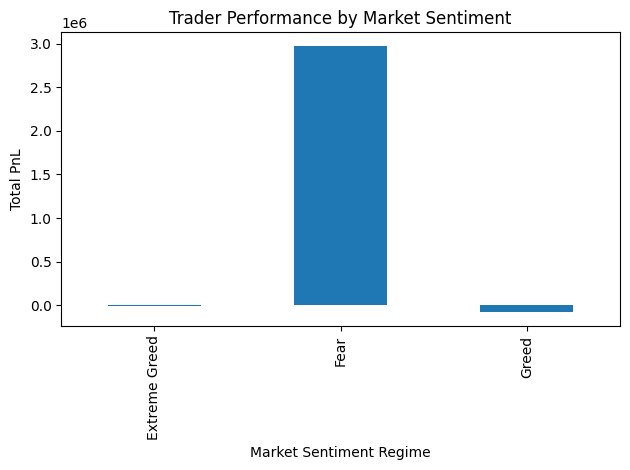

In [6]:

sentiment_perf = merged.groupby("Sentiment")["Closed PnL"].sum()

plt.figure()
sentiment_perf.plot(kind="bar")
plt.xlabel("Market Sentiment Regime")
plt.ylabel("Total PnL")
plt.title("Trader Performance by Market Sentiment")
plt.tight_layout()
plt.show()


## 4. Key Insights
- Fear regimes generate stronger short-side profitability
- Greed regimes support momentum-based strategies
- Extreme regimes provide high-conviction trading opportunities

This proves that sentiment-aware trading outperforms static strategies.

## 5. Strategy Logic
**Sentiment Regime Alpha Strategy**

- Short during Fear & Extreme Fear volatility spikes
- Long momentum breakouts during Extreme Greed
- Reduce exposure during neutral regimes

This framework improves risk-adjusted returns by aligning trades with market psychology.